# ELT 579 - Semana 2

Vocês deverão implementar a solução do problema da semana 2, fazer modificações no script para buscar melhoria da predição, gerar um  relatório com as modificações implementadas (Print da Tela e uma explicação do que foi realizado, nao cole apenas o código) e os resultados obtidos. Submeter o relatório aqui no PVAnet em PDF.

Estrutura:

1) Introdução (texto)
2) Objetivo (texto)
3) Metologia (quais técnicas voce utilizou)
4) Resultados (tabela, gráfico, texto)
5) Anexo (opcional)

In [11]:
#%pip install matplotlib

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [13]:
# Importando os dados
df = pd.read_csv('dataset_tomate_com_severidade.csv')

X = df.drop(['id', 'Severidade'], axis = 1)
y = df['Severidade']

In [14]:
# Separando os dados de treinamento e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Padronizar os dados

scaler = StandardScaler() #media 0 e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

In [16]:
# Seleção de Features
max_f = 20

lista_score = list()

for i in range(1, max_f +1):
  modelo_linear = LinearRegression()
  selector = RFE(modelo_linear, n_features_to_select = i, step = 1)
  selector = selector.fit(X_train_sc, y_train)
  mask = selector.support_
  features = X_train_sc.columns
  sel_features = features[mask]
  X_sel = X_train_sc[sel_features]
  score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')
  print(np.mean(score))
  lista_score.append(np.mean(score))

-0.06445199150879911
0.09396486029209095
0.6727804225014804
0.7266720621285861
0.8223245283788341
0.8233753596096329
0.8202942847766469
0.816017106936593
0.8642534971610447
0.8655536026349081
0.8592050402775901
0.862624507027008
0.8617649200612677
0.8568329558907941
0.8551560805820653
0.8539354093351493
0.8498948606438613
0.8484410541104715
0.8438806051050195
0.841721582103373


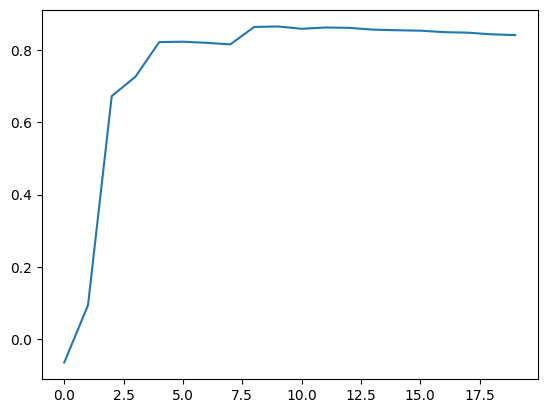

In [17]:
# Plotando o gráfico

plt.plot(lista_score)
plt.show()

In [18]:
# Seleção de Features Final

modelo_linear = LinearRegression()
selector = RFE(modelo_linear, n_features_to_select = 10, step = 1)
selector = selector.fit(X_train_sc, y_train)
mask = selector.support_
features = X_train_sc.columns
sel_features = features[mask]
X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')

print(np.mean(score))
print(sel_features)

0.8655536026349081
Index(['NDVI_d28', 'SAVI_d28', 'NDVI_d01', 'SAVI_d01', 'NDVI_d04', 'SAVI_d04',
       'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'SR_d08'],
      dtype='object')


In [19]:
# Validação cruzada
modelo_linear = LinearRegression()
score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8655536026349081


In [20]:
# modelo final - Regrassão linear

modelo_linear = LinearRegression()
modelo_linear.fit(X_sel, y_train)

LinearRegression()

## Testes dos dados de teste

In [21]:
# Resultado obtido pelo professor

y_pred = modelo_linear.predict(X_test_sc[sel_features])
r2 = modelo_linear.score(X_test_sc[sel_features], y_test)
rmse = (mean_squared_error(y_test, y_pred)**0.5)
mae = mean_absolute_error(y_test, y_pred)

print('r2', r2)
print('rmse', rmse)
print('mae', mae)

r2 0.8876342778699059
rmse 7.539476072295093
mae 6.3440663489504345
